## 1. Import Library, Load Dataset & Exploration Images from 2 Categories (Cataract and Normal)

In [35]:
# Meng-import library-library yang akan dibutuhkan selama proses eksperimen
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
from tensorflow import keras
from glob import glob
from keras.optimizers import SGD, Adam, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from keras.applications import EfficientNetB7 # Library untuk algoritma EfficientNetB7

In [23]:
# Memanggil semua data gambar dari 2 label gambar yang berbeda di dalam folder Dataset dengan 2 Label (Katarak dan Normal)
cataract_label_image = "Dataset dengan 2 Label (Katarak dan Normal)/Cataract"
normal_label_image = "Dataset dengan 2 Label (Katarak dan Normal)/Normal"

In [24]:
"""
Memanggil semua data gambar berdasarkan nama file gambar dengan seluruh format
gambar yang tersedia seperti .png/.jpg/.jpeg, dll, dari kategori/label data gambar mata katarak
"""
# Variabel untuk menampung semua data/nama file gambar dengan label/kategori mata katarak
cataract_images = glob(cataract_label_image + "/*")

# Menampilkan hasil dari variabel "cataract_images" untuk melihat semua data gambar di dalam label/kategori mata katarak
print(cataract_images)

['Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\0_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\103_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1062_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1083_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1084_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1102_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1102_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1115_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1126_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\112_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1144_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1144_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1164_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1167_right.jpg', 'Da

In [25]:
"""
Memanggil semua data gambar berdasarkan nama file gambar dengan seluruh format
gambar yang tersedia seperti .png/.jpg/.jpeg, dll, dari kategori/label data gambar mata normal
"""

# Variabel untuk menampung semua data/nama file gambar dengan label/kategori mata normal
normal_images = glob(normal_label_image + "/*")

# Menampilkan hasil dari variabel "normal_images" untuk melihat semua data gambar di dalam label/kategori mata normal
print(normal_images)

['Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1034_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1034_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1060_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1060_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1253_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1253_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2329_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2329_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2331_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2331_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2332_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2332_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2334_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Normal\\2334_right.jpg', 'Dataset dengan 2 Label (K

Berdasarkan 2 script diatas saya menggunakan sebuah fungsi yang bernama glob. Fungsi glob merupakan sebuah fungsi yang dapat memanggil seluruh nama file yang memiliki kecocokan pola yang ada di dalam sub-folder data-data tersebut. Fungsi glob biasanya dilakukan pada pemrosesan/eksperimen image processing. Pada kasus 2 script diatas yang merupakan main folder (folder utama) adalah nama folder yang bernama "Dataset dengan 2 Label (Katarak dan Normal)". Di dalam main folder terdapat 2 buah sub-folder dengan nama "Cataract" dan "Normal". Kedua sub-folder tersebut sudah pasti menyimpan data-data gambar yang diwakili oleh nama-nama file dari masing-masing data gambar tersebut yang sudah pasti dibedakan berdasarkan 2 sub-folder yakni Cataract dan Normal.

Sebagai contoh script diatas memiliki nama file 1034_left.jpg dan 1034_right.jpg yang merupakan gambar mata dengan kategori/label Normal dari folder utama dalam eksperimen ini yakni "Dataset dengan 2 Label (Katarak dan Normal)". Nama file 1034_left.jpg dan 1034_right.jpg juga menandakan bahwa kedua gambar ini merupakan gambar mata sepasang (kiri dan kanan) dengan kategori mata yang normal. Hal ini juga berlakukan untuk setiap file yang ada di dalam label Normal dan Cataract yang berada dalam script diatas kategori mata Normal.

In [26]:
# Melihat total data dari kategori/label mata katarak dan mata normal
print("Sepuluh Nama File Teratas dari Data Gambar dengan Label/Kategori Mata Katarak: \n", cataract_images[0:10], "\n")
print("Total Data pada Label Gambar Mata Katarak: ", len(cataract_images), "\n")

print("Sepuluh Nama File Teratas dari Data Gambar dengan Label/Kategori Mata Normal: \n", normal_images[0:10], "\n")
print("Total Data pada Label Gambar Mata Normal: ", len(normal_images), "\n")

Sepuluh Nama File Teratas dari Data Gambar dengan Label/Kategori Mata Katarak: 
 ['Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\0_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\103_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1062_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1083_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1084_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1102_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1102_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1115_left.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\1126_right.jpg', 'Dataset dengan 2 Label (Katarak dan Normal)/Cataract\\112_right.jpg'] 

Total Data pada Label Gambar Mata Katarak:  1038 

Sepuluh Nama File Teratas dari Data Gambar dengan Label/Kategori Mata Normal: 
 ['Dataset dengan 2 Label (Katarak dan Normal)/Normal\\1034_left.jpg', 'Data

In [27]:
# Mengecek resolusi/dimensi dari lima gambar dengan label/kategori mata Normal

print("--------------------Resolusi/Dimensi dari Kelima Gambar dengan Label Mata Normal--------------------")

# Gambar mata dengan label Normal dengan urutan file ke-1.074 (List gambar paling terakhir dari label mata Normal)
normal_eye_1073 = Image.open(str(normal_images[1073]))
width, height = normal_eye_1073.size # .size merupakan sebuah function untuk memanggil ukuran pada suatu gambar
print("Dimensi Ukuran Gambar Mata Normal dengan List/Urutan ke-1.074 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-85
normal_eye_84 = Image.open(str(normal_images[84]))
width, height = normal_eye_84.size
print("Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-85 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-148
normal_eye_147 = Image.open(str(normal_images[147]))
width, height = normal_eye_147.size
print("Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-148 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-872
normal_eye_871 = Image.open(str(normal_images[871]))
width, height = normal_eye_871.size
print("Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-872 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-1001
normal_eye_1000 = Image.open(str(normal_images[1000]))
width, height = normal_eye_1000.size
print("Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-1001 :", str(width) + "x" + str(height))

--------------------Resolusi/Dimensi dari Kelima Gambar dengan Label Mata Normal--------------------
Dimensi Ukuran Gambar Mata Normal dengan List/Urutan ke-1.074 : 512x512
Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-85 : 512x512
Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-148 : 512x512
Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-872 : 512x512
Dimensi Ukuran Gambar Mata Normal dengan List/Urutan File ke-1001 : 512x512


Hasil output diatas menunjukkan bahwa kelima resolusi/dimensi gambar dari mata berlabel normal memiliki panjang sebesar 512 piksel dan lebar sebesar 512 piksel. Artinya adalah kelima gambar tersebut sudah memiliki ukuran yang sama merata antar gambar satu sampai gambar kelima yang saya pilih secara acak tetapi walaupun begitu saya tidak dapat memastikan apakah semua gambar memiliki panjang dan lebar yang sama (512 x 512) atau diantara 1.074 total data dari gambar mata berlabel normal terdapat beberapa gambar yang memiliki dimensi yang berbeda dari 512 x 512. Maka dari itu saya nantinya akan membuat ukuran gambar menjadi sama rata di tahapan augmentasi gambar di dalam tahapan preprocessing.

Selanjutnya saya akan melakukan hal yang sama yaitu mengecek apakah kelima gambar dari mata yang memiliki penyakit katarak juga memiliki ukuran dimensi yang sama dengan mata berlabel normal atau tidak.

In [28]:
# Mengecek resolusi/dimensi dari lima gambar dengan label/kategori mata Normal

print("--------------------Resolusi/Dimensi dari Kelima Gambar dengan Label Mata Katarak--------------------")

# Gambar mata dengan label Normal dengan urutan file ke-651
normal_eye_650 = Image.open(str(cataract_images[650]))
width, height = normal_eye_650.size # .size merupakan sebuah function untuk memanggil ukuran pada suatu gambar
print("Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan ke-651 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-85
normal_eye_84 = Image.open(str(normal_images[84]))
width, height = normal_eye_84.size
print("Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-85 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-1074 (List gambar paling terakhir dari label mata katarak)
normal_eye_1073 = Image.open(str(normal_images[1073]))
width, height = normal_eye_1073.size
print("Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-1074 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-247
normal_eye_246 = Image.open(str(normal_images[246]))
width, height = normal_eye_246.size
print("Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-247 :", str(width) + "x" + str(height))

# Gambar mata dengan label Normal dengan urutan file ke-93
normal_eye_92 = Image.open(str(normal_images[92]))
width, height = normal_eye_92.size
print("Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-93 :", str(width) + "x" + str(height))

--------------------Resolusi/Dimensi dari Kelima Gambar dengan Label Mata Katarak--------------------
Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan ke-651 : 256x256
Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-85 : 512x512
Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-1074 : 512x512
Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-247 : 512x512
Dimensi Ukuran Gambar Mata Katarak dengan List/Urutan File ke-93 : 512x512


Hasil diatas menunjukkan bahwa keempat resolusi/dimensi dari gambar mata berpenyakit katarak memiliki ukuran dimensi yang sama dengan dimensi yang telah didapatkan pada kelima gambar mata normal yakni panjang sebesar 512 piksel dan lebar sebesar 512 piksel. Tetapi ada perbedaan yaitu dimensi pada gambar katarak dengan urutan (list) ke-651 pada sub-folder Cataract memiliki dimensi yakni 256x256.

Walaupun begitu keempat gambar dari mata berlabel/berkategori katarak sudah memiliki ukuran yang sama merata antar gambar satu sampai gambar keempat yang saya pilih secara acak tetapi saya tidak dapat memastikan apakah semua gambar memiliki panjang dan lebar yang sama (512 x 512) atau diantara 1.038 total data dari gambar mata berlabel katarak terdapat beberapa gambar yang memiliki dimensi yang berbeda/diluar dari 512 x 512 (seperti pada contoh gambar mata katarak dengan list ke-651). Maka dari itu untuk membuat ukuran gambar, baik dengan label data gambar katarak/normal, menjadi sama rata akan dilakukan di tahapan augmentasi gambar yang ada di dalam tahapan preprocessing data gambar menggunakan fungsi resize untuk image data khususnya pada eksperimen image processing.

## 2. Displaying Some Another Image Data from Cataract and Normal Labels

### 2.1. Showing One Image per List from Cataract and Normal Eye's Labels

#### 2.1.1. Six Pictures of Cataract Eye Label

Dataset dengan 2 Label (Katarak dan Normal)/Cataract\1102_right.jpg


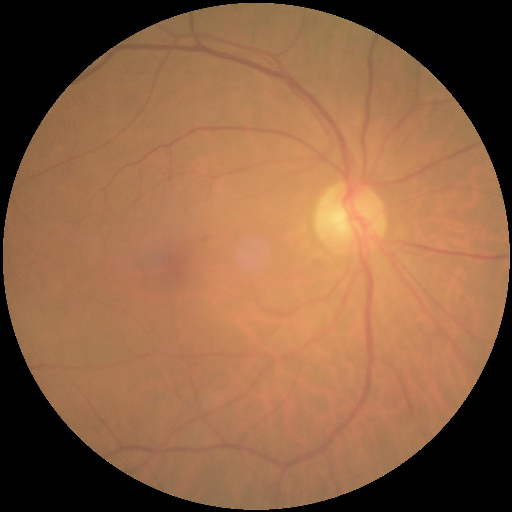

In [29]:
# Menampilkan gambar dengan urutan ketujuh dari indeks gambar pada label mata katarak
cataract_image7 = list(cataract_images)
print(cataract_image7[6])

# Membuka gambar dari list/urutan pada indeks keenam atau dengan kata lain melihat gambar ketuju dari mata katarak
Image.open(str(cataract_image7[6]))

Dataset dengan 2 Label (Katarak dan Normal)/Cataract\2132_left.jpg


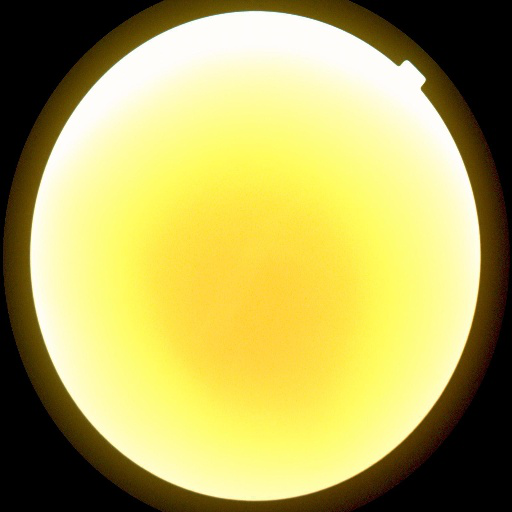

In [30]:
# Menampilkan gambar mata katarak dengan urutan gambar ke-89 berdasarkan urutan (list) data di dalam label mata katarak
cataract_image89 = list(cataract_images)
print(cataract_image89[88])

# Membuka gambar dari list ke-89 atau dengan kata lain melihat gambar ke-89 dari label/kategori mata katarak
Image.open(str(cataract_image89[88]))

Dataset dengan 2 Label (Katarak dan Normal)/Cataract\2074_right.jpg


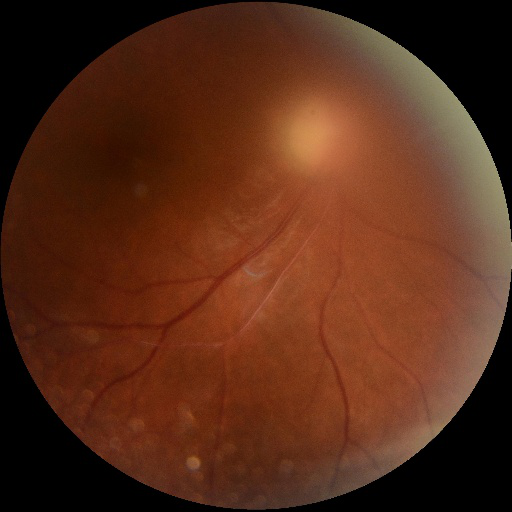

In [31]:
# Menampilkan gambar mata katarak dengan urutan gambar ke-36 berdasarkan urutan (list) data di dalam label mata katarak
cataract_image36 = list(cataract_images)
print(cataract_image36[35])

# Membuka gambar dari list ke-36 atau dengan kata lain melihat gambar ke-36 dari label/kategori mata katarak
Image.open(str(cataract_image36[35]))

Dataset dengan 2 Label (Katarak dan Normal)/Cataract\_348_8120738.jpg


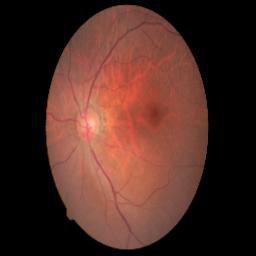

In [32]:
# Menampilkan gambar mata katarak dengan urutan gambar ke-838 berdasarkan urutan (list) data di dalam label mata katarak
cataract_image838 = list(cataract_images)
print(cataract_image838[837])

# Membuka gambar dari list ke-838 atau dengan kata lain melihat gambar ke-838 dari label/kategori mata katarak
Image.open(str(cataract_image838[837]))

Dataset dengan 2 Label (Katarak dan Normal)/Cataract\_22_9724179.jpg


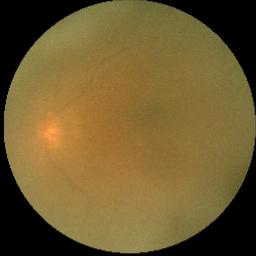

In [33]:
# Menampilkan gambar mata katarak dengan urutan gambar ke-630 berdasarkan urutan (list) data di dalam label mata katarak
cataract_image630 = list(cataract_images)
print(cataract_image630[629])

# Membuka gambar dari list ke-630 atau dengan kata lain melihat gambar ke-838 dari label/kategori mata katarak
Image.open(str(cataract_image630[629]))

Dataset dengan 2 Label (Katarak dan Normal)/Cataract\_84_9231607.jpg


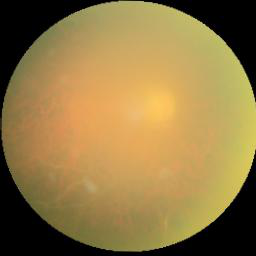

In [34]:
# Menampilkan gambar mata katarak dengan urutan gambar ke-1.012 berdasarkan urutan (list) data di dalam label mata katarak
cataract_image1012 = list(cataract_images)
print(cataract_image1012[1011])

# Membuka gambar dari list ke-1.012 atau dengan kata lain melihat gambar ke-1.012 dari label/kategori mata katarak
Image.open(str(cataract_image1012[1011]))

#### 2.1.2. Six Pictures of Normal Eye Label

In [38]:
import plotly.express as px

fig = plt.resize(normal_images[0], (205, 136))
fig.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'resize'